# Car Vs Ambulance classification using ensemble CNN


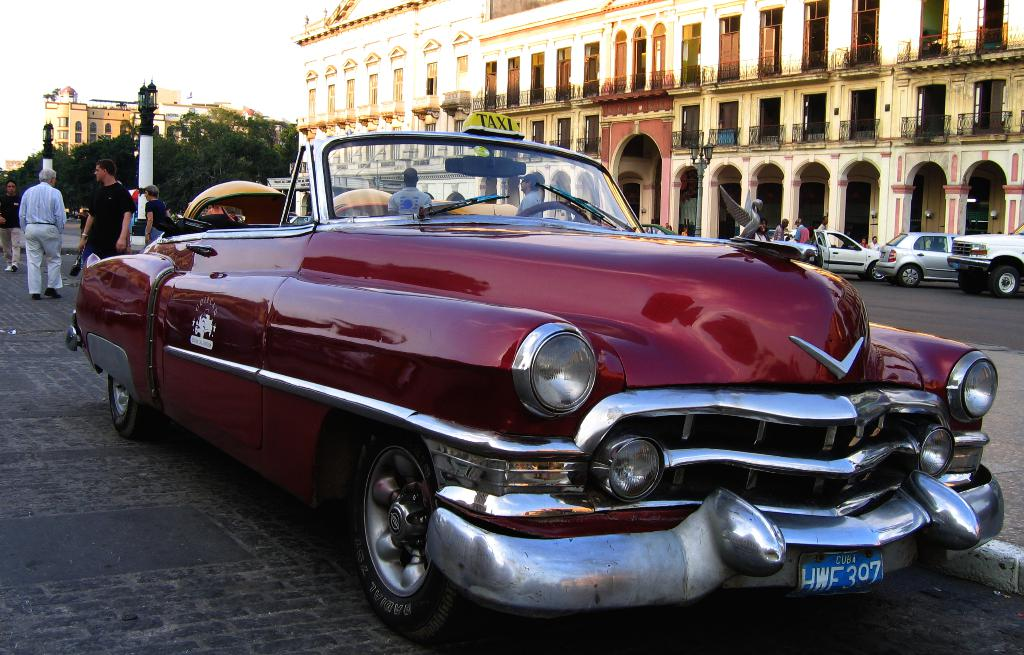

## 1. **Introduction**
Here’s a bullet-point description of the dataset:

### About Dataset
**Source of the Dataset** : [image-classification-and-yolo-dataset](https://www.kaggle.com/datasets/amansingh0000000/image-classification-and-yolo-dataset/data) \
**Classes**: Contains images of two primary classes: cars and ambulances. \
**Diversity**: Images include various angles, lighting conditions, and backgrounds.  \
**Labeling**: Each image is labeled for accurate classification and detection. \

**Applications**: \
**Image classification**: Identifying whether an image contains a car or an ambulance. \
**Object detection**: Locating and recognizing cars and ambulances within images. \
**Use Cases**: Ideal for projects such as traffic monitoring, emergency vehicle detection, and automated vehicle recognition systems. \
               Train file is for different types of Cars and Ambulances images. \
               Label file for the labels,which show the labels regarding about the images. 


## Planning
* Dataset also contain coordinates for each object in the image
* First I will try to work on only Object classification problem
* Then i will try to use those coordinates and make this problem as an Object detection

## 2. Data Preparation

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import matplotlib.image as img
import random
import pathlib 
import os

2024-09-18 16:52:26.184178: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 16:52:26.195401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 16:52:26.198897: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-18 16:52:26.207777: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def download_datasets_from_kaggle(dataset_url:str, dataset_dir:str)-> None:
    # Dowload the dataset
    data_dir = pathlib.Path(dataset_dir)
    data_dir.mkdir(exist_ok=True)
    if os.path.isdir(dataset_dir):
        od.download(dataset_url, data_dir=data_dir)
    

In [3]:
# Dowload the dataset


dataset_url = 'https://www.kaggle.com/datasets/amansingh0000000/image-classification-and-yolo-dataset/data'
# Look into the data directory
dataset_dir = '../dataset'
download_datasets_from_kaggle(dataset_url=dataset_url, dataset_dir=dataset_dir)

Skipping, found downloaded files in "../dataset/image-classification-and-yolo-dataset" (use force=True to force download)


I. Quick look at the downloaded data

In [4]:
dataset_dir= dataset_dir + '/image-classification-and-yolo-dataset' + '/Ambulance_Car'
dataset_dir

'../dataset/image-classification-and-yolo-dataset/Ambulance_Car'

In [5]:
train_dir = dataset_dir + '/Train'
lables_dir = dataset_dir + '/Label'

In [6]:
len(os.listdir(train_dir)), len(os.listdir(lables_dir))

(1138, 1138)

In [8]:
# images_per_class = []
# all_classes = []
# for class_name in classes:
#     total_images = len(os.listdir(os.path.join(dataset_dir, class_name)))
#     images_per_class.append(total_images)
#     all_classes.append(class_name)
#     print(f'{class_name.capitalize()}: contains {total_images} images')

II. Load data into the memory

In [24]:
import glob
import cv2

images = []
labels = []

for _image_path in glob.glob(train_dir+"/*.jpg"):
    _img = cv2.imread(filename=_image_path)
    # print(_image_path)
    file_name_without_ext = _image_path.split('/')[-1].split('.')[0]
    label_file = f'{lables_dir}/{file_name_without_ext}.txt'
    # print(label_file)
    with open(label_file, 'r') as _labels:
        for line in _labels.readlines():
            _label, x_min, y_min, x_max, y_max = line.split()
            labels.append(_label)
            images.append(_img)
            # print(_label)
              

../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/ae1a38d5641c9f58.jpg
../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/75dc920e513f78e3.jpg
../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/eebb94bc91d152b8.jpg
../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/42b5c8751cfc6565.jpg
../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/5513aef4e0fc1421.jpg
../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/afed1526c244fbbb.jpg
../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/503173c071165bfb.jpg
../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/4040dba5246a6be4.jpg
../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/0d218c603bc42f7b.jpg
../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/eebc358ac98f09df.jpg
../dataset/image-classification-and-yolo-dataset/Ambulance_Car/Train/91d16af67277c40a.jpg
../dataset

In [26]:
len(images), len(labels)

(2784, 2784)

In [56]:
import random
def plot_images_with_label(images, labels):
    random_nums = random.sample(range(0, len(images)), 6)
    for idx, rand_num in enumerate(random_nums):
        img_resize = cv2.resize(images[rand_num], (224,224))
        plt.subplot(3, 3, idx+1)
        plt.imshow(img_resize)
        plt.title(labels[rand_num])
        plt.axis('off')
    plt.show() 

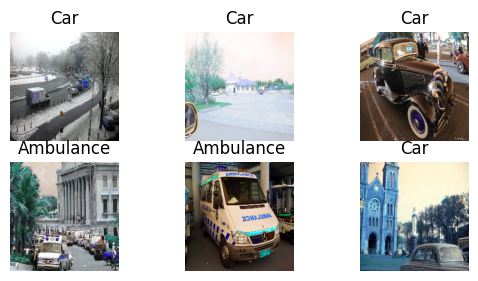

In [57]:
plot_images_with_label(images, labels)